#### Ta-lib
https://github.com/mrjbq7/ta-lib

http://mrjbq7.github.io/ta-lib/

#### Sofien Kaabar
https://kaabar-sofien.medium.com/

https://medium.com/python-in-plain-english/the-rsi-macd-technical-indicator-a-python-study-71cf949707eb

In [1]:
# Imports
import pandas as pd
import numpy as np
import investpy
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from itertools import product
import warnings

import talib

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")

#### Data - Eod, Minutes etc.

In [3]:
# ticker = 'NIFTY 50'
# prices = investpy.get_index_historical_data(ticker,country='India',from_date='01/01/2000',
#                                         to_date='31/01/2021')
# prices = prices.sort_values(by='Date', ascending=True)
# prices = prices[~prices.index.duplicated()]
# prices = prices.drop('Currency', axis=1)
# prices.rename(columns = {'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace=True)
# prices.head()

In [4]:
ticker = '^NSEI'
columns = ['Adj Close','High','Low','Open','Volume']
prices = yf.download(ticker, start="2019-06-01", end="2021-01-31", interval = "60m")[columns] # 1m, 5m, 15m, 30m, 45m, 60m
prices.columns = ['close','high','low','open','volume']
prices.tail()

[*********************100%***********************]  1 of 1 completed


,close,high,low,open,volume
Datetime,,,,,
2021-01-29 11:15:00+05:30,13786.950195,13870.049805,13776.799805,13843.549805,0
2021-01-29 12:15:00+05:30,13767.799805,13840.650391,13757.549805,13796.250000,0
2021-01-29 13:15:00+05:30,13804.099609,13806.900391,13728.599609,13791.250000,0
2021-01-29 14:15:00+05:30,13625.599609,13873.000000,13608.200195,13755.599609,0
2021-01-29 15:15:00+05:30,13660.799805,13670.650391,13597.849609,13626.000000,0


In [5]:
data = prices.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2861 entries, 2019-06-03 09:15:00+05:30 to 2021-01-29 15:15:00+05:30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2861 non-null   float64
 1   high    2861 non-null   float64
 2   low     2861 non-null   float64
 3   open    2861 non-null   float64
 4   volume  2861 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 134.1 KB


In [6]:
data['returns'] = np.log(data.close / data.close.shift(1))  

#### Define indicators

In [7]:
data['macd'], data['macdsignal'], data['macdhist'] = talib.MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

In [8]:
data.head()

,close,high,low,open,volume,returns,macd,macdsignal,macdhist
Datetime,,,,,,,,,
2019-06-03 09:15:00+05:30,11976.450195,11977.200195,11920.750000,11953.750000,0,NaN,NaN,NaN,NaN
2019-06-03 10:15:00+05:30,11995.200195,11996.250000,11961.250000,11976.200195,0,0.001564,NaN,NaN,NaN
2019-06-03 11:15:00+05:30,12018.099609,12018.700195,11984.349609,11994.799805,0,0.001907,NaN,NaN,NaN
2019-06-03 12:15:00+05:30,12022.450195,12025.549805,12006.200195,12017.900391,0,0.000362,NaN,NaN,NaN
2019-06-03 13:15:00+05:30,12054.349609,12054.349609,12000.049805,12022.400391,0,0.002650,NaN,NaN,NaN


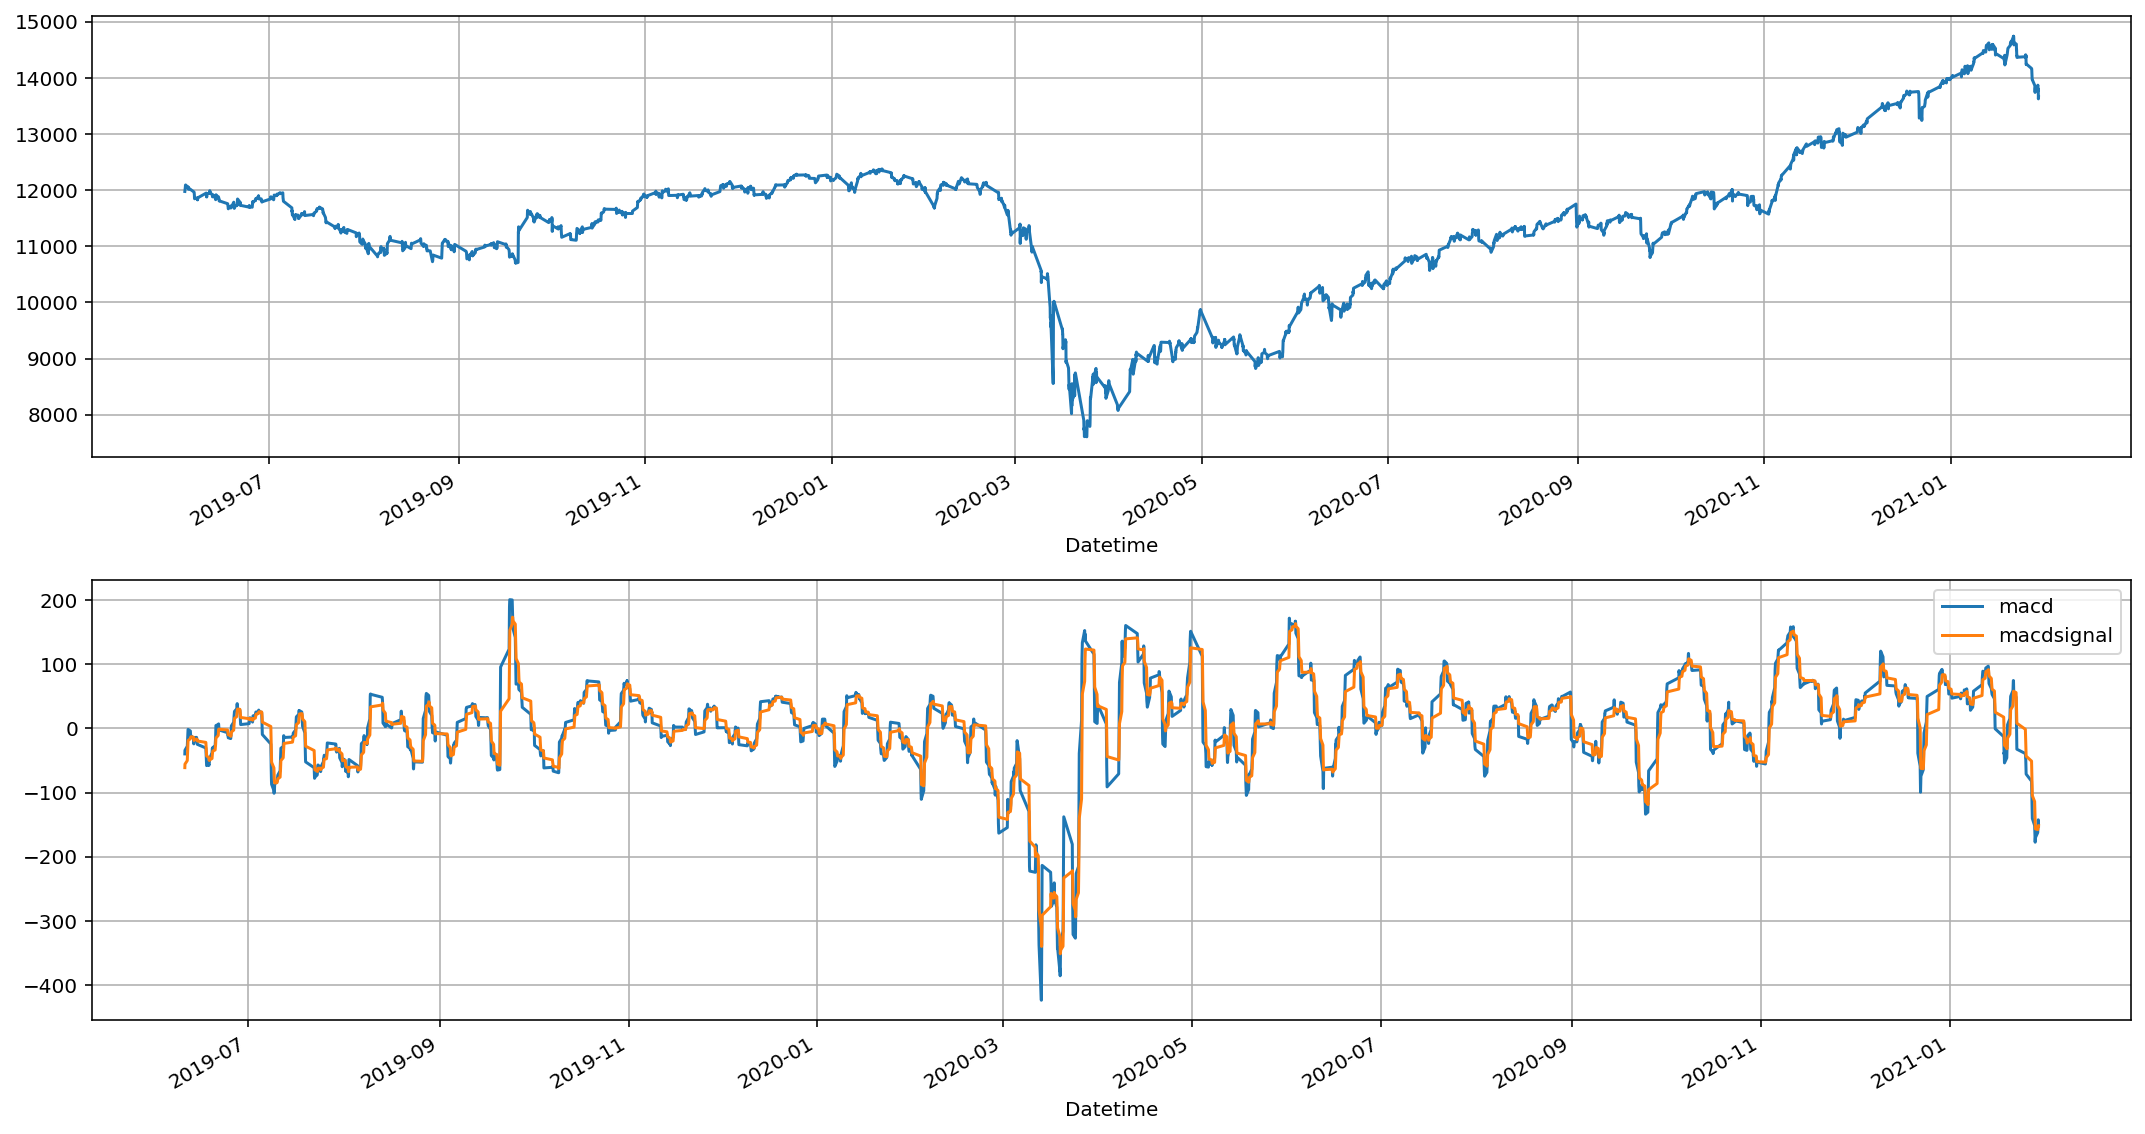

In [9]:
cols = ['macd','macdsignal']
fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
data.close.plot(ax=axes[0])
axes[0].grid(True)
data[cols].plot(ax=axes[1])
axes[1].grid(True)
fig.tight_layout()

In [10]:
data['rsi'] = talib.RSI(data.close.values, timeperiod=14)

In [11]:
data.head(3)

,close,high,low,open,volume,returns,macd,macdsignal,macdhist,rsi
Datetime,,,,,,,,,,
2019-06-03 09:15:00+05:30,11976.450195,11977.200195,11920.750000,11953.750000,0,NaN,NaN,NaN,NaN,NaN
2019-06-03 10:15:00+05:30,11995.200195,11996.250000,11961.250000,11976.200195,0,0.001564,NaN,NaN,NaN,NaN
2019-06-03 11:15:00+05:30,12018.099609,12018.700195,11984.349609,11994.799805,0,0.001907,NaN,NaN,NaN,NaN


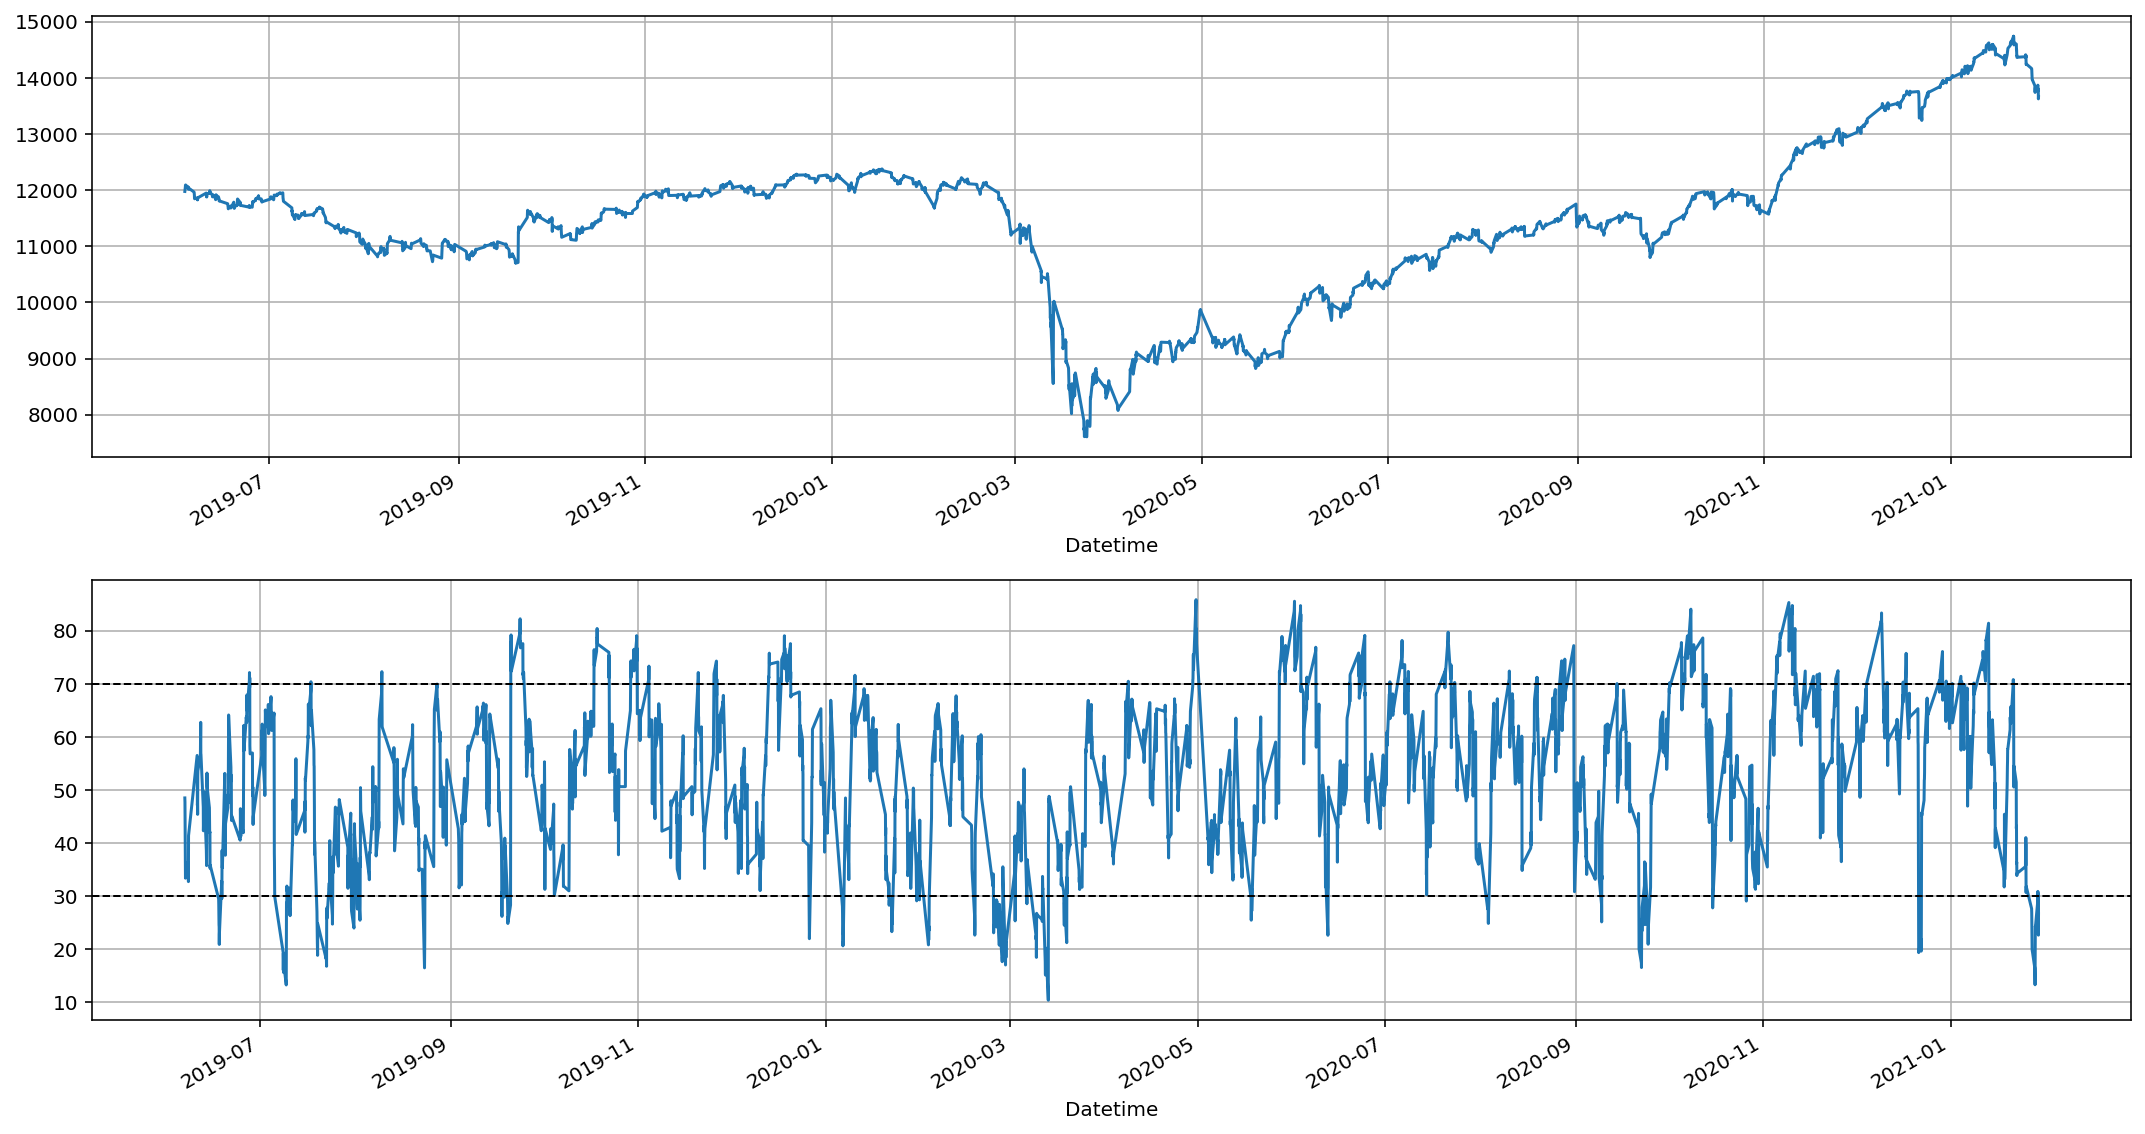

In [12]:
fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
data.close.plot(ax=axes[0])
axes[0].grid(True)
data.rsi.plot(ax=axes[1])
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
axes[1].grid(True)
fig.tight_layout()

In [13]:
data['rsi_macd'] = talib.RSI(data.macd.values, timeperiod=14)

In [14]:
data.head()

,close,high,low,open,volume,returns,macd,macdsignal,macdhist,rsi,rsi_macd
Datetime,,,,,,,,,,,
2019-06-03 09:15:00+05:30,11976.450195,11977.200195,11920.750000,11953.750000,0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-03 10:15:00+05:30,11995.200195,11996.250000,11961.250000,11976.200195,0,0.001564,NaN,NaN,NaN,NaN,NaN
2019-06-03 11:15:00+05:30,12018.099609,12018.700195,11984.349609,11994.799805,0,0.001907,NaN,NaN,NaN,NaN,NaN
2019-06-03 12:15:00+05:30,12022.450195,12025.549805,12006.200195,12017.900391,0,0.000362,NaN,NaN,NaN,NaN,NaN
2019-06-03 13:15:00+05:30,12054.349609,12054.349609,12000.049805,12022.400391,0,0.002650,NaN,NaN,NaN,NaN,NaN


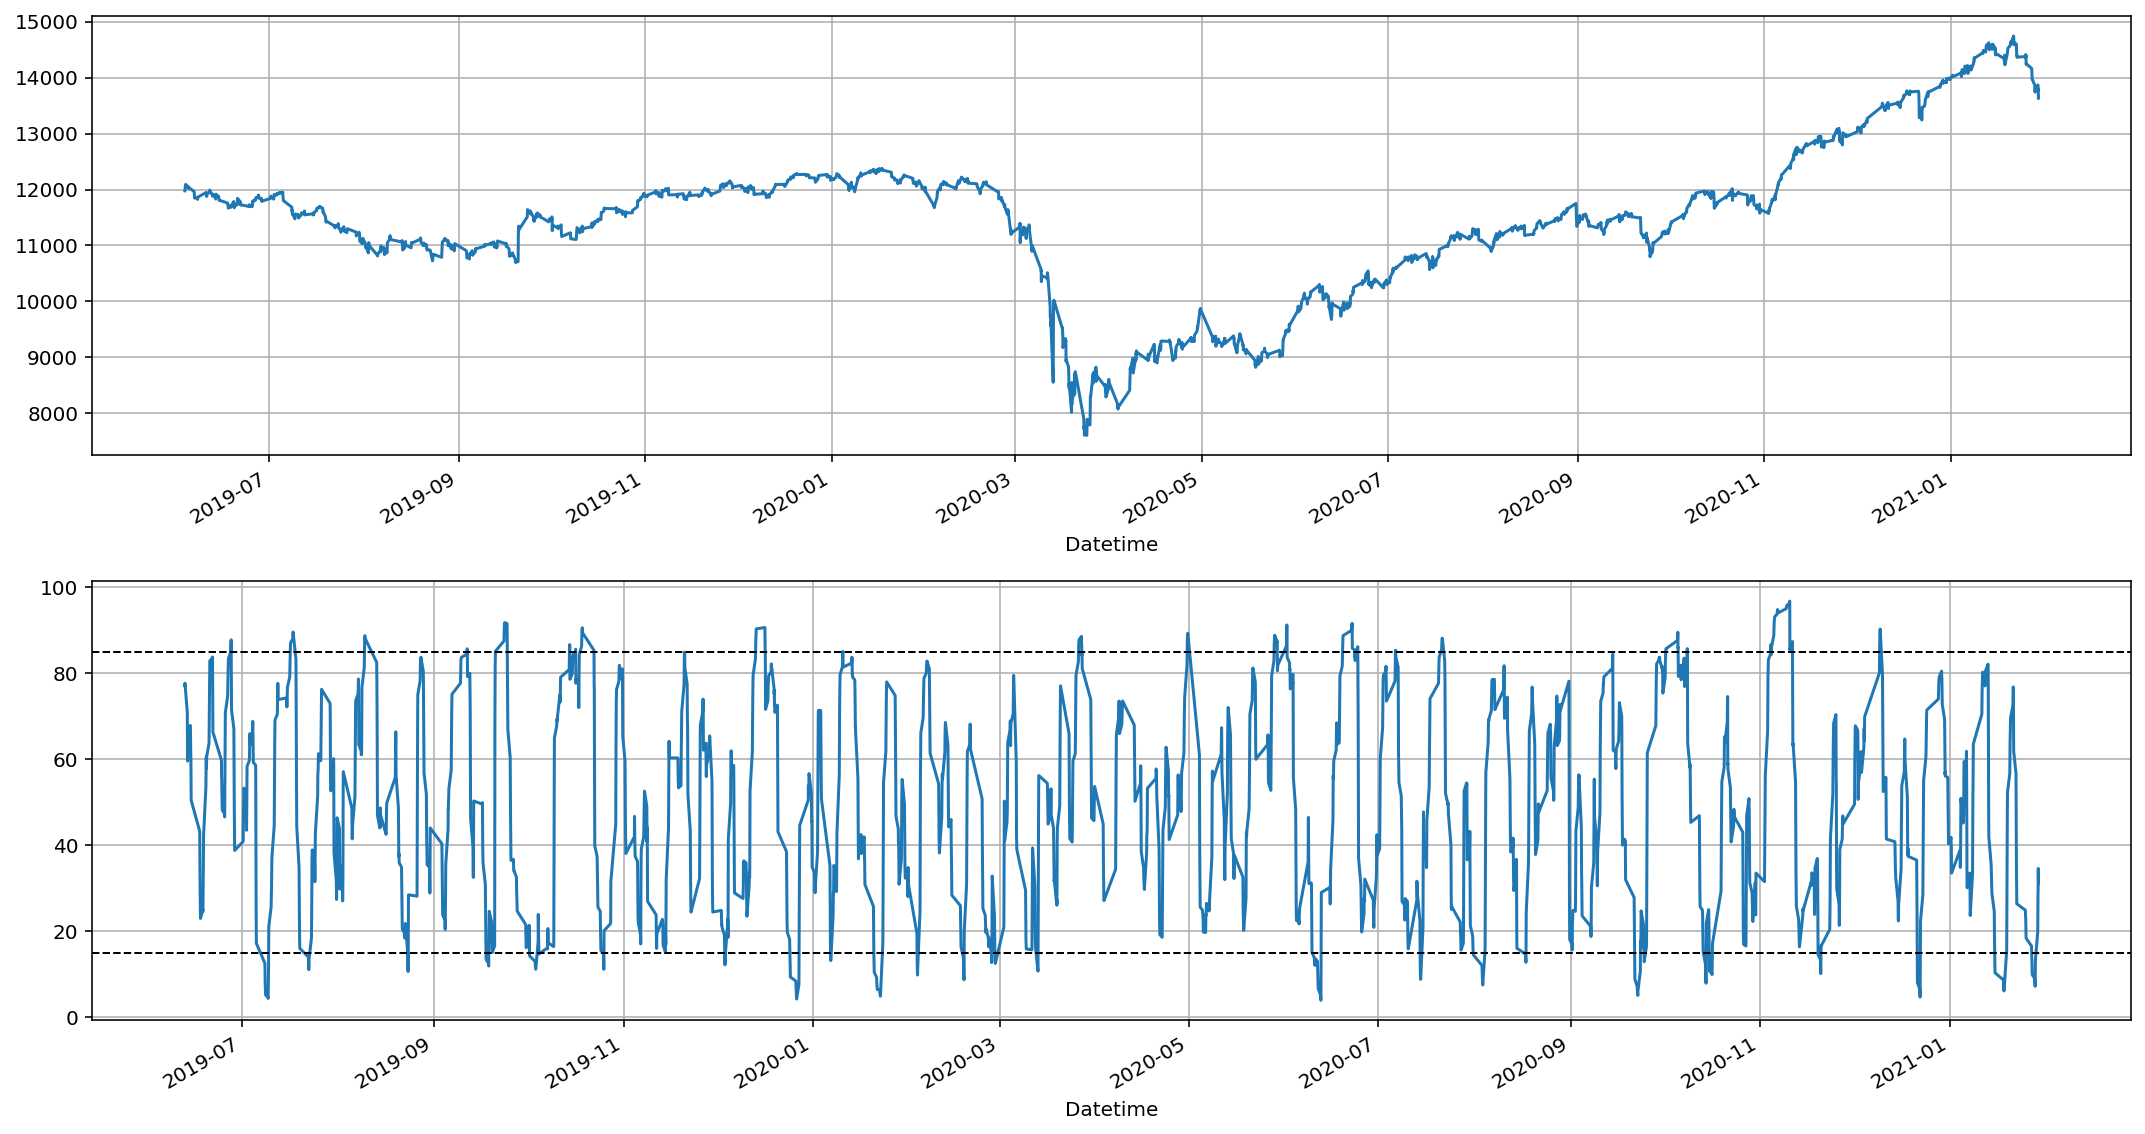

In [15]:
fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
data.close.plot(ax=axes[0])
axes[0].grid(True)
data.rsi_macd.plot(ax=axes[1])
axes[1].axhline(85, lw=1, ls='--', c='k')
axes[1].axhline(15, lw=1, ls='--', c='k')
axes[1].grid(True)
fig.tight_layout()

#### Generate signal

In [16]:
data = data.dropna()
data['sell'] = np.where((data.rsi_macd > 75) & (data.rsi_macd.shift(1) < 75) & (data.rsi_macd.shift(2) < 75), -1, 0)
data['buy'] = np.where((data.rsi_macd < 15) & (data.rsi_macd.shift(1) > 15) & (data.rsi_macd.shift(2) > 15), 1, 0)

# if Data[i, what] < lower_barrier and Data[i - 1, what] > lower_barrier and Data[i - 2, what] > lower_barrier :
#             Data[i, buy] = 1
       
# if Data[i, what] > upper_barrier and Data[i - 1, what] < upper_barrier and Data[i - 2, what] < upper_barrier :
#     Data[i, sell] = -1

In [17]:
data['position'] = data.buy + data.sell
data.tail()

,close,high,low,open,volume,returns,macd,macdsignal,macdhist,rsi,rsi_macd,sell,buy,position
Datetime,,,,,,,,,,,,,,
2021-01-29 11:15:00+05:30,13786.950195,13870.049805,13776.799805,13843.549805,0,-0.005999,-150.729308,-155.659176,4.929869,26.480945,28.515754,0,0,0
2021-01-29 12:15:00+05:30,13767.799805,13840.650391,13757.549805,13796.250000,0,-0.001390,-148.680351,-154.263411,5.583061,25.577258,30.037510,0,0,0
2021-01-29 13:15:00+05:30,13804.099609,13806.900391,13728.599609,13791.250000,0,0.002633,-142.484969,-151.907723,9.422754,30.424055,34.572875,0,0,0
2021-01-29 14:15:00+05:30,13625.599609,13873.000000,13608.200195,13755.599609,0,-0.013015,-150.246593,-151.575497,1.328904,22.622137,31.792279,0,0,0
2021-01-29 15:15:00+05:30,13660.799805,13670.650391,13597.849609,13626.000000,0,0.002580,-151.807433,-151.621884,-0.185549,26.618478,31.248008,0,0,0


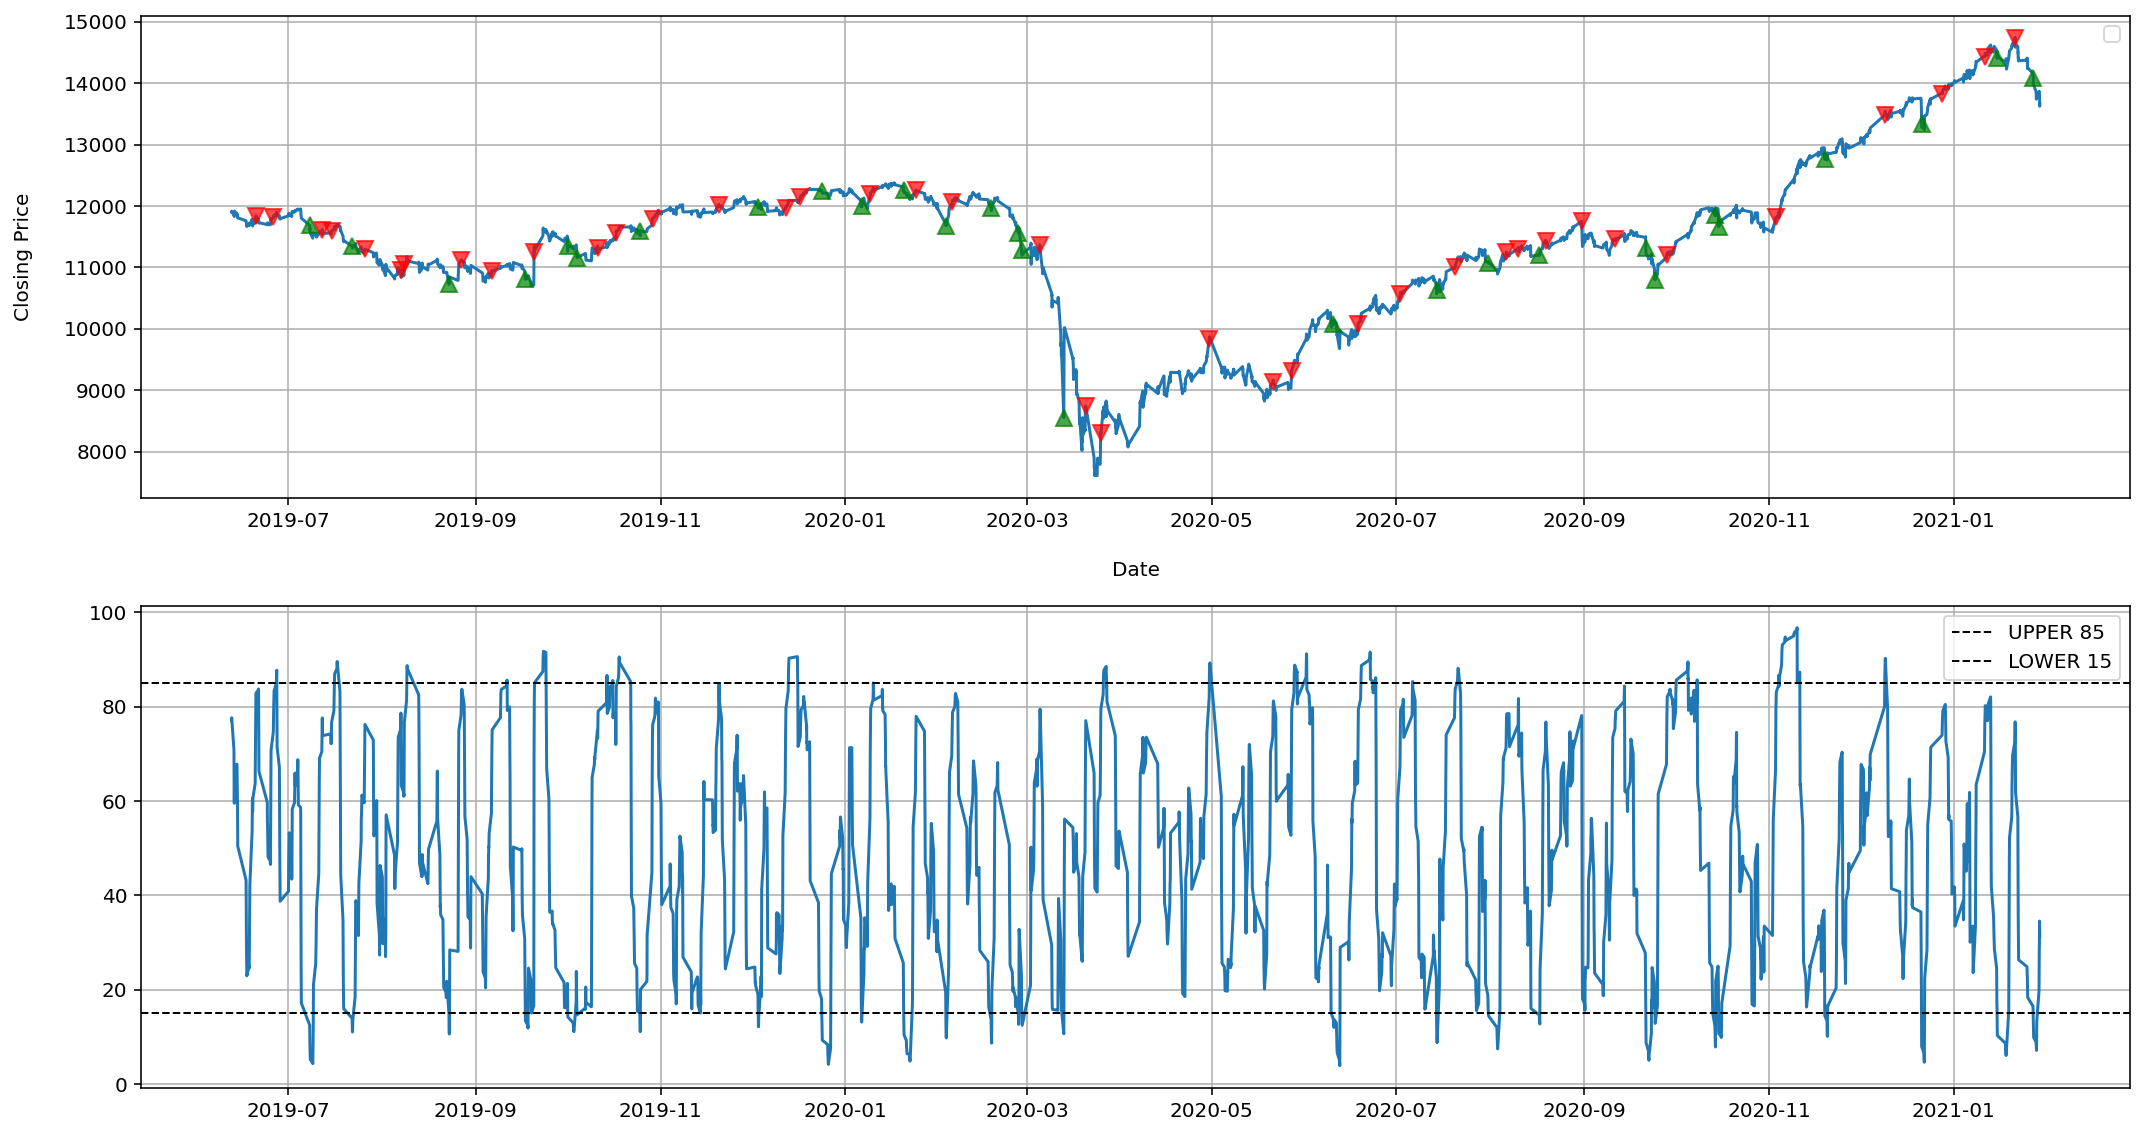

In [18]:
# visualize trading signals and position
# fig=plt.figure(figsize=(14,6))
# bx = fig.add_subplot(111)   
# bx2 = bx.twinx()

fig, ax= plt.subplots(nrows=2, figsize=(15, 8))
l1 = ax[0].plot(data.close)
u1 = ax[0].plot(data.close[data['buy'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)
d1 = ax[0].plot(data.close[data['sell'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)
ax[0].set_ylabel('Closing Price')
ax[0].yaxis.labelpad=15
ax[0].set_xlabel('Date')
ax[0].xaxis.labelpad=15
ax[0].legend([l1,u1,d1], ['Nifty 50', 'LONG {}'.format('Nifty 50'), 'SHORT {}'.format('Nifty 50')], loc ='best')
ax[0].grid(True)

l2 =  ax[1].plot(data.rsi_macd)
h1 = ax[1].axhline(85, lw=1, ls='--', c='k')
h2 = ax[1].axhline(15, lw=1, ls='--', c='k')
ax[1].legend([l2,h1,h1], ['RSI_MACD', 'UPPER {}'.format(85), 'LOWER {}'.format(15)], loc ='best')
ax[1].grid(True)
fig.tight_layout()

In [19]:
data['strategy'] = data['position'].shift(1) * data['returns']

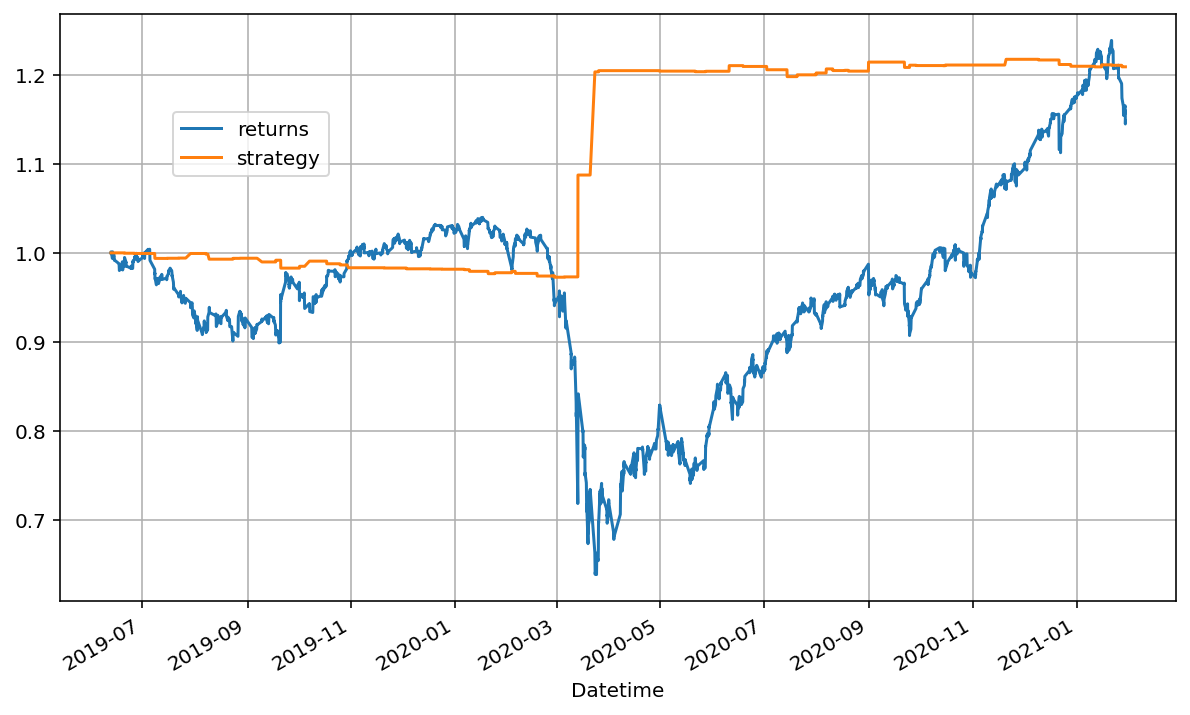

In [20]:
ax = data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax.grid(True)
# plt.savefig('../../images/ch15/strat_plot_03.png');

In [21]:
per = np.exp(data[['returns', 'strategy']].sum())
print(per)
print(per['returns'])

returns     1.147610
strategy    1.208797
dtype: float64
1.1476095315359882


In [22]:
(data.strategy.diff() != 0).sum() 

134

In [23]:
macd_fast = range(3, 91, 3)  
macd_slow = range(16, 137, 4)

In [24]:
results = pd.DataFrame()
returns = np.log(data.close / data.close.shift(1))
for FAST, SLOW in product(macd_fast, macd_slow):  
    data = prices.copy()
    data['returns'] = returns #np.log(data.close / data.close.shift(1))  
    data['macd'], data['macdsignal'], data['macdhist'] = talib.MACD(data.close, fastperiod=FAST, slowperiod=SLOW, signalperiod=9)    
    data['rsi'] = talib.RSI(data.close.values, timeperiod=14)
    data['rsi_macd'] = talib.RSI(data.macd.values, timeperiod=14)
    data['sell'] = np.where((data.rsi_macd > 70) & (data.rsi_macd.shift(1) < 70) & (data.rsi_macd.shift(2) < 70), -1, 0)
    data['buy'] = np.where((data.rsi_macd < 30) & (data.rsi_macd.shift(1) > 30) & (data.rsi_macd.shift(2) > 30), 1, 0)
    data['position'] = data.buy + data.sell
    data['strategy'] = data['position'].shift(1) * data['returns']    
    data.dropna(inplace=True)

    perf = np.exp(data[['returns', 'strategy']].sum())
    results = results.append(pd.DataFrame(
                {'FAST': FAST, 'SLOW': SLOW,
                 'MARKET': perf['returns'],
                 'STRATEGY': perf['strategy'],
                 'OUT': perf['strategy'] - perf['returns']},
                 index=[0]), ignore_index=True)  

In [25]:
results.sort_values('OUT', ascending=False).head(10)

,FAST,SLOW,MARKET,STRATEGY,OUT
0,3,16,1.147552,1.134014,-0.013538
160,18,36,1.149826,1.126948,-0.022878
281,30,24,1.154198,1.115563,-0.038635
190,21,32,1.151814,1.111040,-0.040773
220,24,28,1.146382,1.103041,-0.043341
13,3,68,1.160700,1.116865,-0.043835
14,3,72,1.160542,1.098979,-0.061564
12,3,64,1.165135,1.100506,-0.064629
311,33,20,1.148232,1.082001,-0.066230
15,3,76,1.165190,1.098424,-0.066766


In [26]:
results = pd.DataFrame()
returns = np.log(data.close / data.close.shift(1))

for FAST, SLOW in product(macd_fast, macd_slow):  
    data = prices.copy()
    data['returns'] = returns #np.log(data.close / data.close.shift(1))  
    data['macd'], data['macdsignal'], data['macdhist'] = talib.MACD(data.close, fastperiod=FAST, slowperiod=SLOW, signalperiod=9)    
    data['rsi'] = talib.RSI(data.close.values, timeperiod=14)
    data['rsi_macd'] = talib.RSI(data.macd.values, timeperiod=14)
    data['sell'] = np.where((data.rsi_macd > 70) & (data.rsi_macd.shift(1) < data.rsi_macd) 
                            & (data.rsi_macd.shift(2) < data.rsi_macd.shift(1)), -1, 0)
    data['buy'] = np.where((data.rsi_macd < 30) & (data.rsi_macd.shift(1) > data.rsi_macd) & 
                           (data.rsi_macd.shift(2) > data.rsi_macd.shift(1)), 1, 0)
    data['position'] = data.buy + data.sell
    data['strategy'] = data['position'].shift(1) * data['returns']    
    data.dropna(inplace=True)

    perf = np.exp(data[['returns', 'strategy']].sum())
    results = results.append(pd.DataFrame(
                {'FAST': FAST, 'SLOW': SLOW,
                 'MARKET': perf['returns'],
                 'STRATEGY': perf['strategy'],
                 'OUT': perf['strategy'] - perf['returns']},
                 index=[0]), ignore_index=True) 

In [27]:
results.sort_values('OUT', ascending=False).head(10)

,FAST,SLOW,MARKET,STRATEGY,OUT
62,9,16,1.144087,1.083203,-0.060885
93,12,16,1.144087,1.072841,-0.071246
155,18,16,1.144087,1.044871,-0.099216
124,15,16,1.144087,1.036242,-0.107845
94,12,20,1.144087,1.034729,-0.109358
63,9,20,1.144087,1.034689,-0.109398
95,12,24,1.144087,1.030259,-0.113828
125,15,20,1.144087,1.029054,-0.115033
13,3,68,1.144087,1.011483,-0.132604
50,6,92,1.144087,1.009152,-0.134935


In [28]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FAST      930 non-null    int64  
 1   SLOW      930 non-null    int64  
 2   MARKET    930 non-null    float64
 3   STRATEGY  930 non-null    float64
 4   OUT       930 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.5 KB
